In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [52]:
data = pd.read_csv('/Users/johndocter/Downloads/Data_Viz_Challenge_2025-UCB_Trees.csv')
data = data.fillna(value=0)
print(data.columns)
data = data.drop(['OBJECTID', 'Tree ID', 'Tree Type', 'Species',
       'Cultivar or Varietal', 'Common Name',],axis = 1)


Index(['OBJECTID', 'Tree ID', 'Tree Type', 'Genus', 'Species',
       'Cultivar or Varietal', 'Common Name', 'Canopy Spread', 'Height',
       'Latitude', 'Longitude'],
      dtype='object')


In [53]:
data

,Genus,Canopy Spread,Height,Latitude,Longitude
0,Quercus,19.0,21.0,40.009104,-105.272529
1,Gymnocladus,31.0,47.0,40.009136,-105.272797
2,Quercus,65.0,102.0,40.008888,-105.274886
3,Quercus,42.0,54.0,40.008775,-105.275000
4,Crataegus,18.0,20.0,40.008870,-105.275428
...,...,...,...,...,...
772,Taxodium,15.0,25.0,40.010252,-105.273964
773,Crataegus,15.0,20.0,40.010316,-105.274258
774,Catalpa,5.0,10.0,40.008315,-105.272798
775,Acer,0.0,0.0,40.009700,-105.274889


In [80]:
# Separate features (X) and target variable (y)
X = data.drop('Genus', axis=1)
y = data['Genus']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
tree = DecisionTreeClassifier(random_state=42, max_depth=3)

# Train the model
tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.28205128205128205


[Text(0.5, 0.875, 'Canopy Spread <= 24.5\nsamples = 100.0%\nvalue = [0.018, 0.108, 0.002, 0.002, 0.003, 0.002, 0.002, 0.003\n0.019, 0.002, 0.023, 0.024, 0.052, 0.006, 0.119, 0.006\n0.027, 0.011, 0.002, 0.002, 0.053, 0.005, 0.006, 0.002\n0.003, 0.026, 0.002, 0.002, 0.132, 0.063, 0.003, 0.008\n0.023, 0.029, 0.005, 0.087, 0.045, 0.002, 0.005, 0.003\n0.005, 0.003, 0.01, 0.014, 0.032, 0.002]\nclass = Fraxinus'),
 Text(0.25, 0.625, 'Height <= 25.5\n71.2%\n[0.025, 0.07, 0.002, 0.002, 0.0, 0.0, 0.002, 0.005\n0.016, 0.002, 0.018, 0.032, 0.07, 0.009, 0.12, 0.009\n0.009, 0.007, 0.002, 0.002, 0.075, 0.007, 0.007, 0.002\n0.005, 0.027, 0.0, 0.002, 0.179, 0.05, 0.002, 0.007\n0.032, 0.034, 0.007, 0.057, 0.063, 0.002, 0.0, 0.005\n0.007, 0.005, 0.011, 0.007, 0.005, 0.002]\nFraxinus'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Latitude <= 40.007\n33.2%\n[0.015, 0.097, 0.005, 0.0, 0.0, 0.0, 0.0, 0.005, 0.024\n0.005, 0.019, 0.049, 0.131, 0.005, 0.034, 0.015, 0.005\n0.0, 0.005, 0.005, 0.053, 0.0, 0

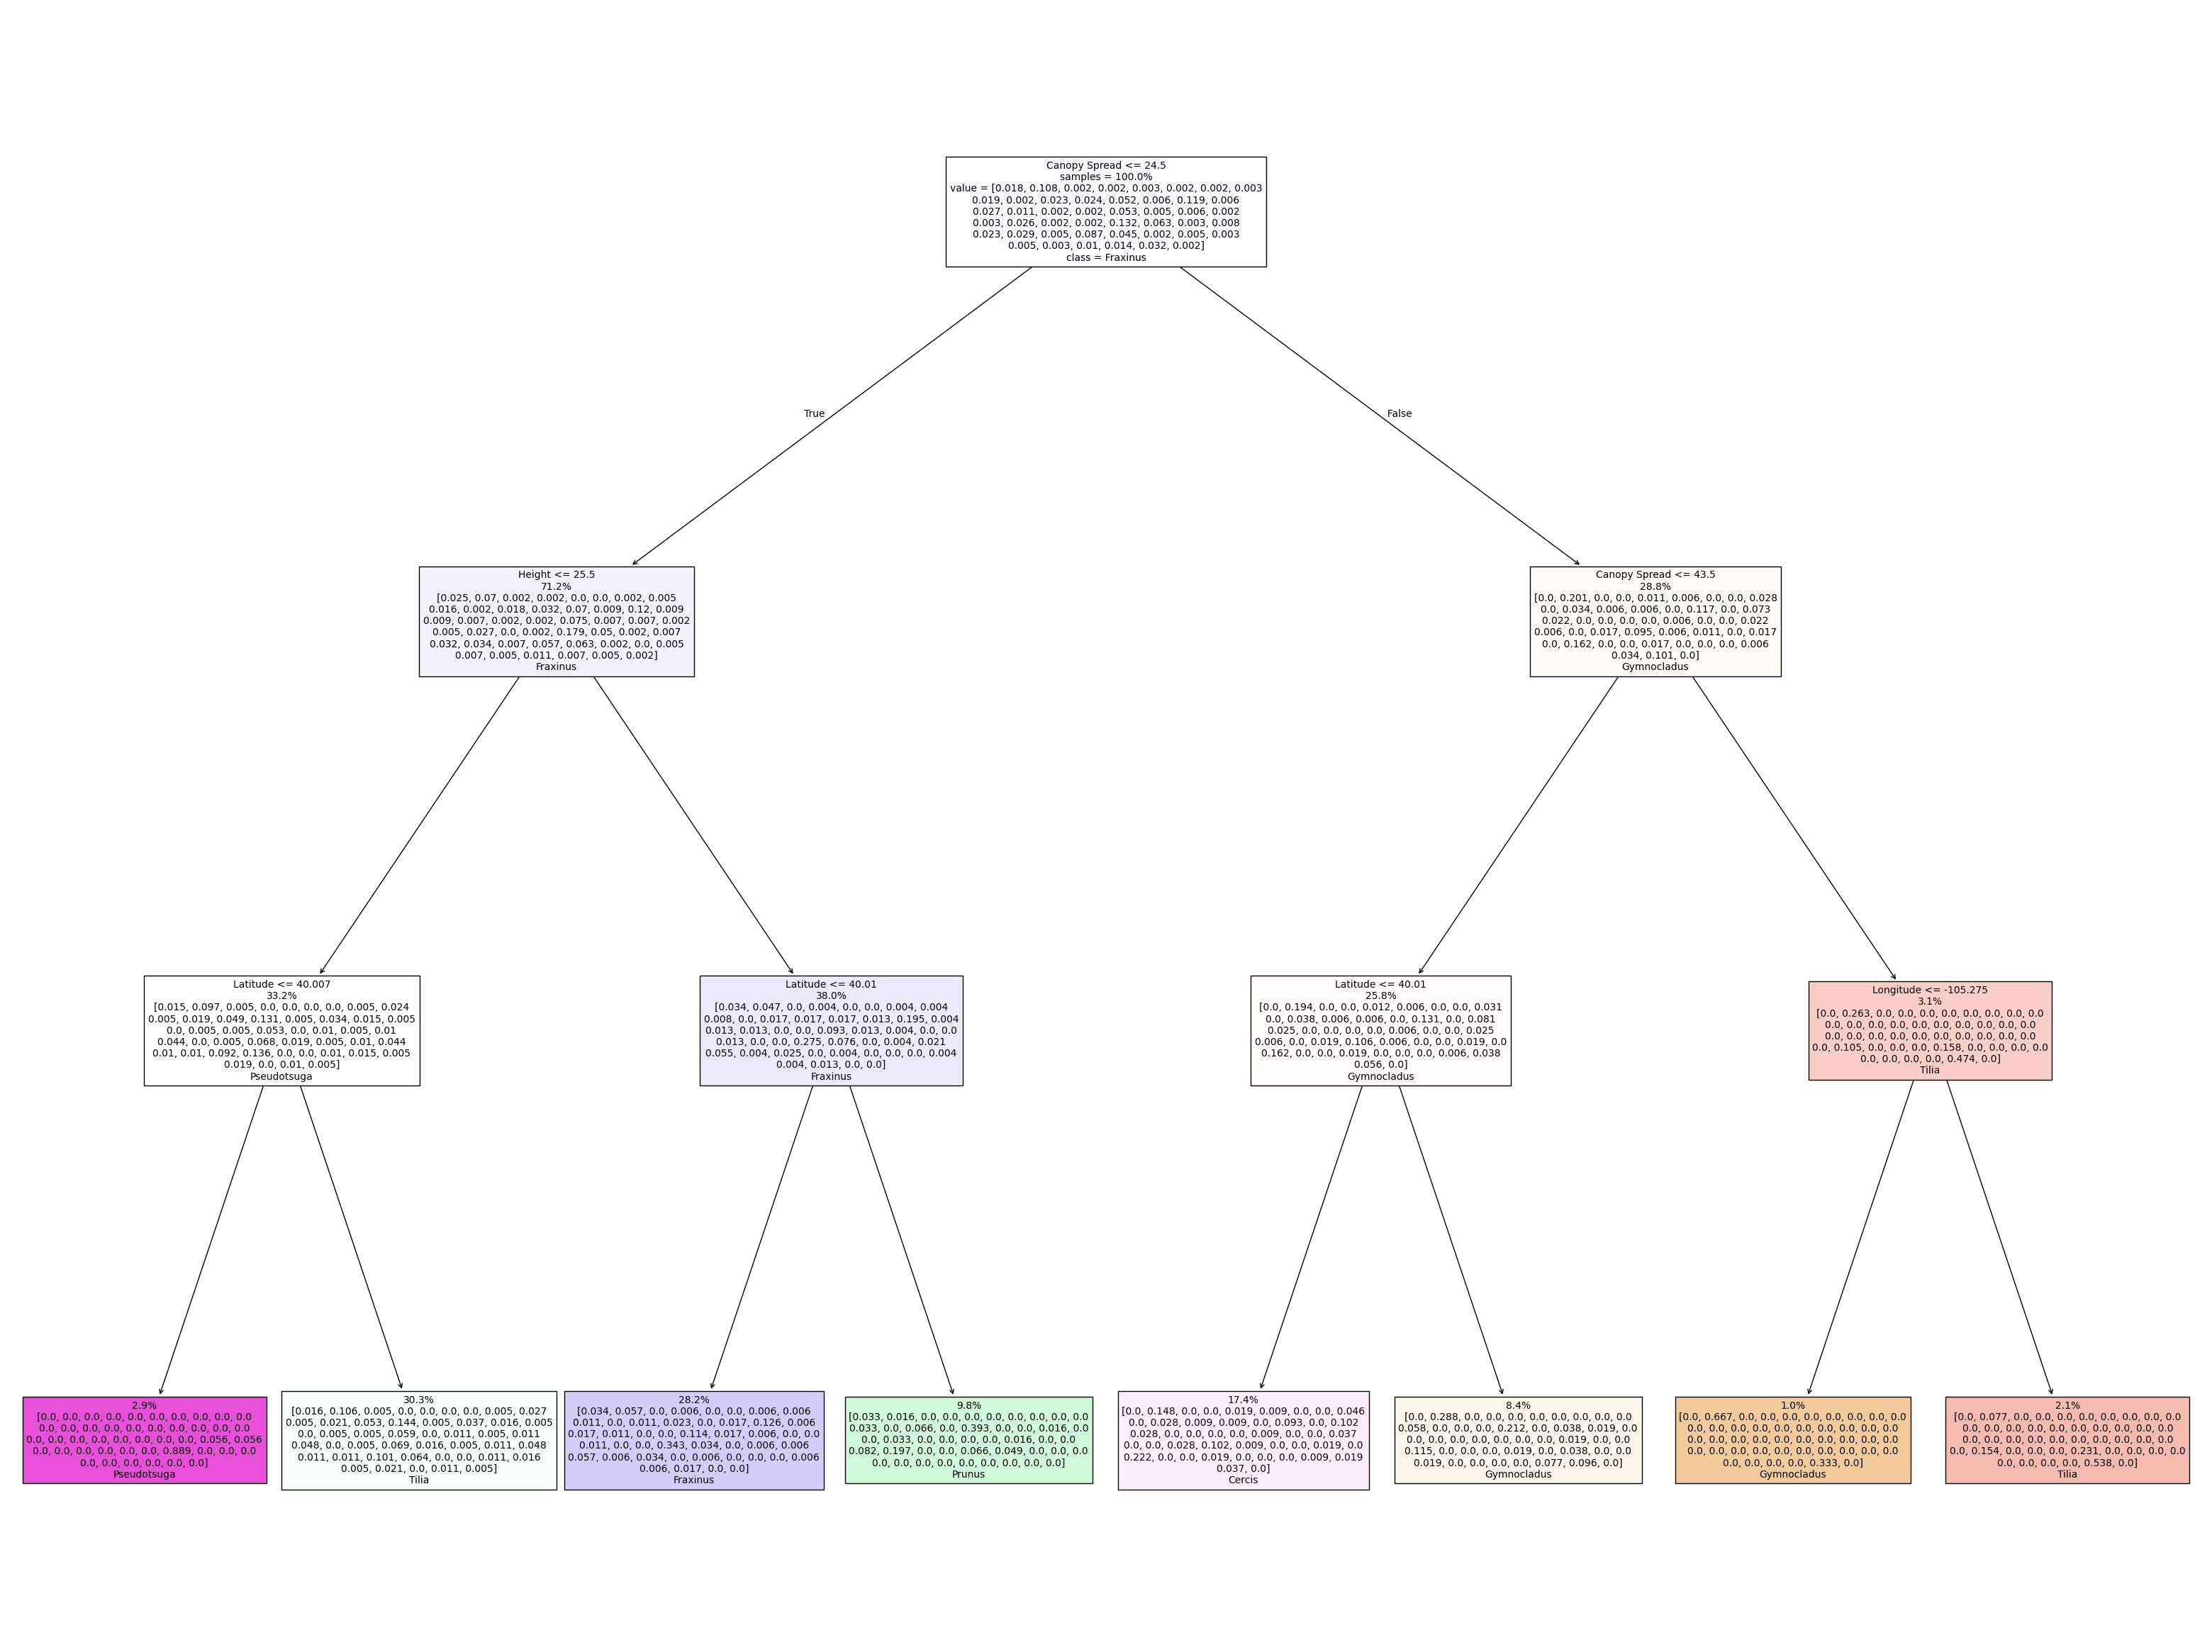

In [81]:
plt.figure(figsize=(40, 30))  # Set figure size for better visibility
plot_tree(tree,filled=True, feature_names=X.columns, class_names=y, fontsize=10,label = 'root', impurity=False, proportion=True) 